# Exploratory Data Analysis
## ROSARIO, Clifford James 
### 2ECE-C

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

### Overview of Dataset

In [50]:
#load the dataset
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Convert the 'streams' column to numeric, coercing errors to NaN if any non-numeric values are found
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

#display the first few rows of the dataset.
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


In [30]:
#dataset dimensions
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

#data types and missing values
print("\nData Types and Missing Values:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Number of rows: 953
Number of columns: 24

Data Types and Missing Values:
track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

Missing Values:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month     

### Basic Descriptive Statistics

In [13]:
mean_streams = df['streams'].mean()
median_streams = df['streams'].median()
std_streams = df['streams'].std()

print(f"\nMean of streams: {mean_streams}")
print(f"Median of streams: {median_streams}")
print(f"Standard deviation of streams: {std_streams}")


Mean of streams: 514137424.93907565
Median of streams: 290530915.0
Standard deviation of streams: 566856949.0388832


Text(0.5, 0, 'Released Year')

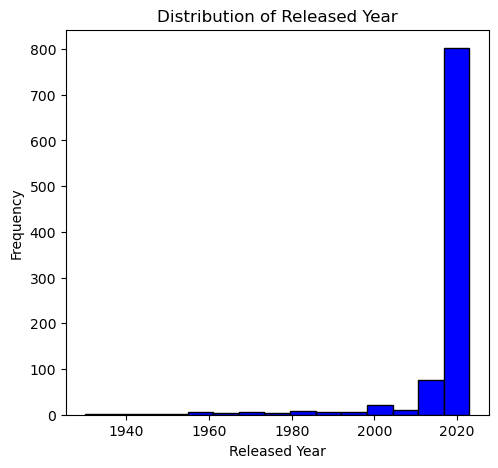

In [27]:
# plot the distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['released_year'].plot(kind='hist', bins=15, color='blue', edgecolor='black')
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')

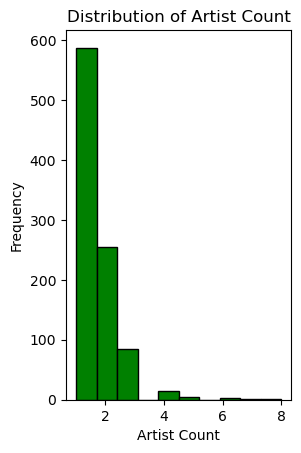

In [16]:
plt.subplot(1, 2, 2)
df['artist_count'].plot(kind='hist', bins=10, color='green', edgecolor='black')
plt.title('Distribution of Artist Count')
plt.xlabel('Artist Count')
plt.show()

### Top Performers

In [47]:
# top 5 most streamed tracks
top_streamed_tracks = df.nlargest(5, 'streams')[['track_name', 'artist(s)_name', 'streams']]
print("\nthe top 5 Most Streamed Tracks is:")
print(top_streamed_tracks)


the top 5 Most Streamed Tracks is:
                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

          streams  
55   3.703895e+09  
179  3.562544e+09  
86   2.887242e+09  
620  2.864792e+09  
41   2.808097e+09  


In [46]:
# top 5 most frequent artists
top_artists = df['artist(s)_name'].value_counts().head(5)
print("\nthe top 5 Most Frequent Artists is:")
print(top_artists)


the top 5 Most Frequent Artists is:
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: artist(s)_name, dtype: int64


### Temporal Trends

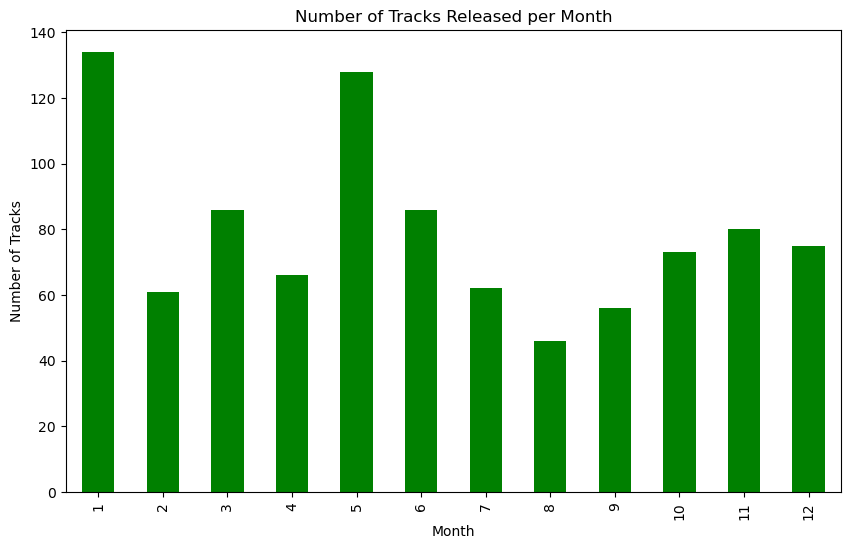

In [45]:
#number of tracks released per month
tracks_per_month = df['released_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
tracks_per_month.plot(kind='bar', color='green')
plt.title('Number of Tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.show()

### Genre and Music Characteristics

In [44]:
#correlation in the streams and musical attributes
correlation = df[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()
dance_energy_corr = df['danceability_%'].corr(df['energy_%'])
valence_acoustic_corr = df['valence_%'].corr(df['acousticness_%'])
print("\nCorrelation with Streams:")
print(correlation['streams'].sort_values(ascending=False))
print(f"\nCorrelation between Danceability and Energy: {dance_energy_corr}")
print(f"Correlation between Valence and Acousticness: {valence_acoustic_corr}")


Correlation with Streams:
streams           1.000000
bpm              -0.002438
energy_%         -0.026051
danceability_%   -0.105457
Name: streams, dtype: float64

Correlation between Danceability and Energy: 0.19809484837625715
Correlation between Valence and Acousticness: -0.08190727483082758


### Platform Popularity

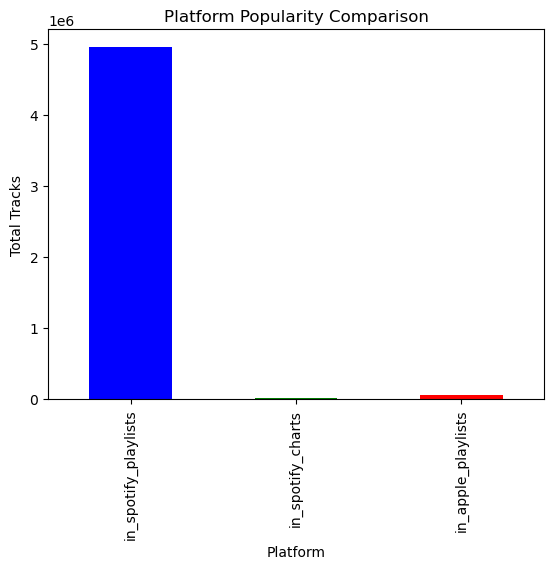


Platform Popularity Comparison:
in_spotify_playlists    4955719
in_spotify_charts         11445
in_apple_playlists        64625
dtype: int64


In [40]:
#comparison
platform_counts = df[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()
# Plotting platform popularity
platform_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Platform Popularity Comparison')
plt.xlabel('Platform')
plt.ylabel('Total Tracks')
plt.show()
print("\nPlatform Popularity Comparison:")
print(platform_counts)

### Advanced Analysis 

In [43]:
key_mode_streams = df.groupby(['key', 'mode'])['streams'].mean().sort_values(ascending=False)
print("\nAverage Streams by Key and Mode:")
print(key_mode_streams)


Average Streams by Key and Mode:
key  mode 
E    Major    7.605963e+08
D#   Major    6.819623e+08
C#   Major    6.285883e+08
A#   Major    6.275336e+08
F#   Minor    5.954921e+08
B    Minor    5.825110e+08
D    Major    5.720180e+08
C#   Minor    5.665252e+08
G#   Major    5.458044e+08
F    Major    5.279311e+08
E    Minor    5.083264e+08
G    Major    4.929813e+08
A#   Minor    4.849231e+08
D#   Minor    4.793647e+08
B    Major    4.363336e+08
F#   Major    4.175450e+08
A    Minor    4.173906e+08
F    Minor    4.102836e+08
A    Major    4.019603e+08
G    Minor    3.637593e+08
D    Minor    3.425588e+08
G#   Minor    3.219036e+08
Name: streams, dtype: float64


In [51]:
#count of tracks in playlist by artist
artist_playlist_counts = df.groupby('artist(s)_name')[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()
top_artists_in_playlists = artist_playlist_counts.sum(axis=1).nlargest(5)
print("\nTop 5 Artists in Playlists/Charts:")
print(top_artists_in_playlists)


Top 5 Artists in Playlists/Charts:
artist(s)_name
The Weeknd      145910
Taylor Swift    135312
Ed Sheeran      130300
Harry Styles    111952
Eminem           87958
dtype: int64
